# Feature Engineering

In [97]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

## Discretization

### Equal Width

In [98]:
from feature_engine.discretisation import EqualWidthDiscretiser

# Load the dataset
x, y = fetch_california_housing(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [102]:
# Perform equal-width discretization on MedInc into 8 bins
disc = EqualWidthDiscretiser(bins=8, variables=['MedInc'], return_boundaries=False)
# Get the boundaries using the training data
disc.fit(x_train)
# Using the values from the training data, 
# apply the transformation to train and test set
x_train_transformed = disc.transform(x_train)
x_test_transformed = disc.transform(x_test)
print(x_train_transformed.MedInc.unique())
x_train_transformed.head()

[0 3 4 2 6 1 5 7]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,0,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,0,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,3,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,0,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,0,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


<Axes: >

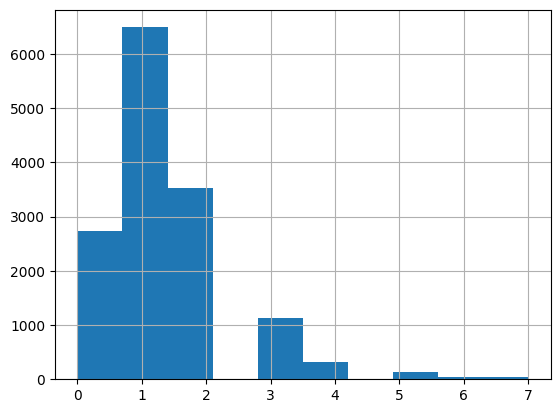

In [103]:
# Chech histogram
x_train_transformed.MedInc.hist()

### Equal Frequency

In [104]:
from sklearn.preprocessing import KBinsDiscretizer

# Perform equal-frequency discretization on MedInc into 8 bins
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="quantile")
# Get the boundaries using the training data
disc.fit(x_train[['MedInc']])
# Using the values from the training data, 
# apply the transformation to train and test set
x_train_transformed[['MedInc']] = disc.transform(x_train[['MedInc']])
x_test_transformed[['MedInc']] = disc.transform(x_test[['MedInc']])
print(x_train_transformed.MedInc.unique())
x_train_transformed.head()

[1. 9. 0. 8. 5. 7. 4. 6. 2. 3.]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.0,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,1.0,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,9.0,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,0.0,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,1.0,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


<Axes: >

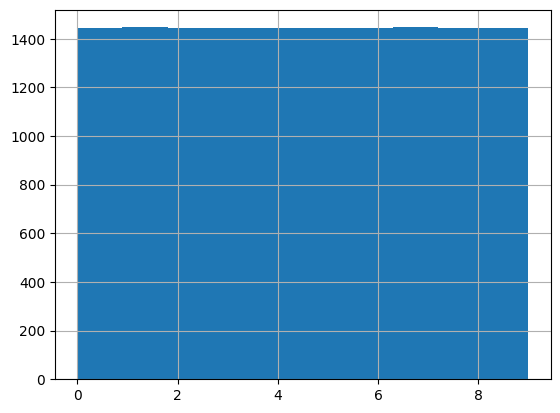

In [105]:
# Chech histogram
x_train_transformed.MedInc.hist()

## Feature Transformation

In [106]:
boston_x, boston_y = fetch_california_housing(return_X_y=True, as_frame=True)

boston_df = boston_x
boston_df['target'] = boston_y
boston_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

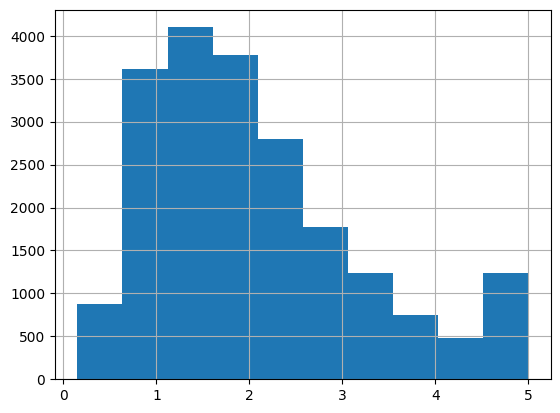

In [107]:
# Check histogram of target
boston_df.target.hist()

### Logarithmic

Original Skewness: 0.9777
Logarithmic Skewness: 0.2759


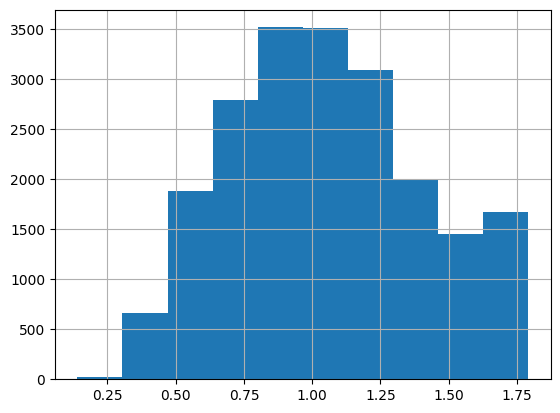

In [108]:
# Calculate the natural log of x + 1
boston_df['target_log'] = np.log1p(boston_df['target'])
boston_df.target_log.hist()

# Positive skewness: skewed to the RIGHT
# Negative skewness: skewed to the LEFT
# -0.5 to 0.5 skewness indicates that the distribution is fairly symmetrical
print(f"Original Skewness: {np.round(skew(boston_df['target']), 4)}")
print(f"Logarithmic Skewness: {np.round(skew(boston_df['target_log']), 4)}")

### Square Root

Original Skewness: 0.9777
Square Root Skewness: 0.4394


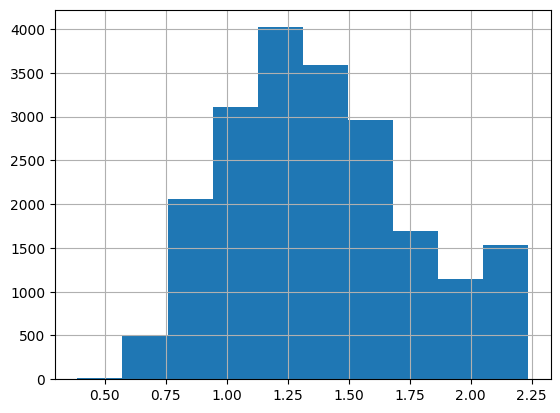

In [109]:
# Calculate the natural log of x + 1
boston_df['target_sqrt'] = boston_df['target'] ** (1/2)
boston_df.target_sqrt.hist()

print(f"Original Skewness: {np.round(skew(boston_df['target']), 4)}")
print(f"Square Root Skewness: {np.round(skew(boston_df['target_sqrt']), 4)}")

### Square

Original Skewness: 0.9777
Square Skewness: 1.8418


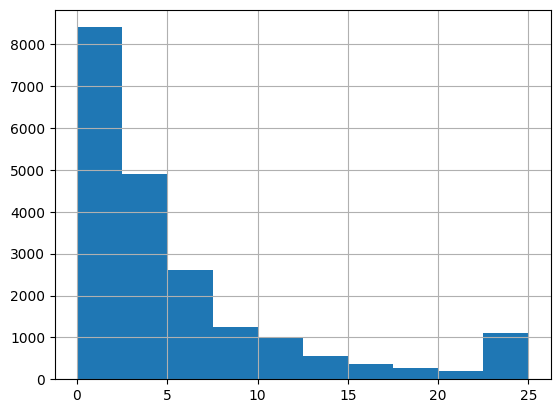

In [110]:
boston_df['target_sqr'] = boston_df['target'] ** (2)
boston_df.target_sqr.hist()

print(f"Original Skewness: {np.round(skew(boston_df['target']), 4)}")
print(f"Square Skewness: {np.round(skew(boston_df['target_sqr']), 4)}")

### Box Cox

Original Skewness: 0.9777
Box Cox Skewness: -0.0121
Box Cox Lambda Value: 0.12474766353082614


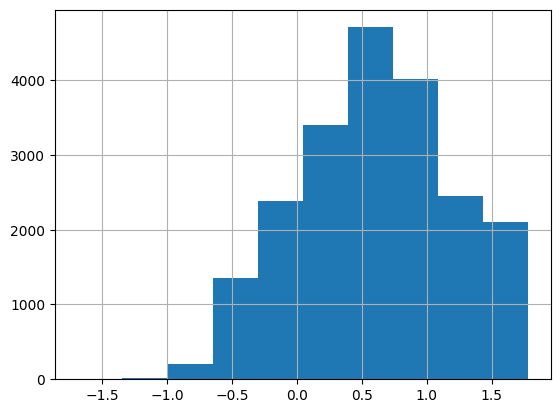

In [111]:
from scipy.stats import boxcox

boston_df['target_boxcox'], lambda_val = boxcox(boston_df['target'])
boston_df.target_boxcox.hist()

print(f"Original Skewness: {np.round(skew(boston_df['target']), 4)}")
print(f"Box Cox Skewness: {np.round(skew(boston_df['target_boxcox']), 4)}")
print(f"Box Cox Lambda Value: {lambda_val}")

## Dimensionality Reduction

### Feature Selection

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


<Axes: >

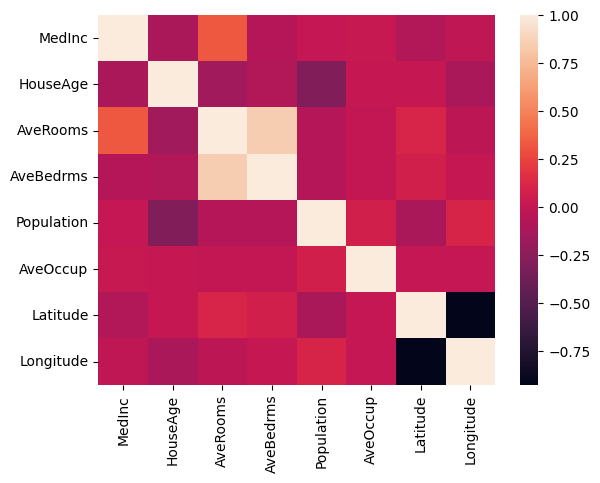

In [115]:
import seaborn as sn
import matplotlib.pyplot as plt

x_boston_df = boston_df.drop(columns=['target_log', 'target_sqr', 'target_sqrt', 'target_boxcox', 'target'])
corr_mat = x_boston_df.corr()
sorted_mat = corr_mat.unstack().sort_values()
# print(sorted_mat)
print(corr_mat)
sn.heatmap(x_boston_df.corr())

### Feature Reduction

In [116]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_labels = cancer.target
cancer_labels = np.reshape(cancer_labels, (cancer_labels.shape[0], 1))

final_data = np.concatenate([cancer_data, cancer_labels], axis=1)
features_labels = np.append(cancer.feature_names,'label')

cancer_df = pd.DataFrame(final_data, columns=features_labels)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [117]:
from sklearn.preprocessing import StandardScaler

# We start by standardizing the data since PCA is influenced 
# based on the scale of the features of the data

x = cancer_df.loc[:, cancer.feature_names].values
x = StandardScaler().fit_transform(x)

# Rename the feature names to standardize the naming convention
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalized_cancer_df = pd.DataFrame(x,columns=feat_cols)
normalized_cancer_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [120]:
from sklearn.decomposition import PCA

# Project the 30-dim cancer data to 2-dim PCs
pca_cancer = PCA(n_components=3)
pc_cancer = pca_cancer.fit_transform(x)

principal_cancer_df = pd.DataFrame(data = pc_cancer, columns = ['PC1', 'PC2', 'PC3'])
principal_cancer_df


,PC1,PC2,PC3
0,9.192837,1.948583,-1.123153
1,2.387802,-3.768172,-0.529288
2,5.733896,-1.075174,-0.551751
3,7.122953,10.275589,-3.232785
4,3.935302,-1.948072,1.389779
...,...,...,...
564,6.439315,-3.576817,2.459494
565,3.793382,-3.584048,2.088475
566,1.256179,-1.902297,0.562727
567,10.374794,1.672010,-1.877026


In [121]:
# Once we have the principal components, we can get the explained_variance_ratio
# It will provide you with the amount of variance each principal component 
# holds after projecting the data to a lower dimensional subspace

print('Explained variation per principal component: {}'.format(pca_cancer.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]
